# Pre

## Info

In [1]:
versioninfo()

Julia Version 1.9.3
Commit bed2cd540a1 (2023-08-24 14:43 UTC)
Build Info:
  Official https://julialang.org/ release
Platform Info:
  OS: Linux (x86_64-linux-gnu)
  CPU: 64 × AMD EPYC 9374F 32-Core Processor
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-14.0.6 (ORCJIT, znver3)
  Threads: 2 on 64 virtual cores


## Switch local project

In [2]:
import Pkg

cd()
Pkg.activate("Dynamical_Core_Julia")
cd("Dynamical_Core_Julia")

  Activating project at `~/Dynamical_Core_Julia`


In [3]:
import PyPlot
import LinearAlgebra as LA

## import local package

In [4]:
using dynamical_core

# Test
include("exp/shallow_water/__unit_test.jl")
# Main
include("exp/shallow_water/__main.jl")

filepath_constructor (generic function with 2 methods)

# Main

## Unit Test

### Spherical_to_Cartesian & Cartesian_to_Spherical

In [23]:
Initial_Condition = "Case 6"
original, final, Cmesh = UnitTest_CoordTrans(IC = Initial_Condition, iter_max = 10)
U_AE = abs.(final[1][:,:,:] - original[1][:,:,:])
V_AE = abs.(final[2][:,:,:] - original[2][:,:,:])
Vor_AE = abs.(final[3][:,:,:] - original[3][:,:,:])
Div_AE = abs.(final[4][:,:,:] - original[4][:,:,:])
println("     Zonal wind L2E : ", LA.norm(U_AE))
println("Meridional wind L2E : ", LA.norm(V_AE))
println(" Vorticity wind L2E : ", LA.norm(Vor_AE))
println("Divergence wind L2E : ", LA.norm(Div_AE))

     Zonal wind L2E : 46.46024000474512
Meridional wind L2E : 45.418089796989634
 Vorticity wind L2E : 1.2731947971401015e-17
Divergence wind L2E : 0.0


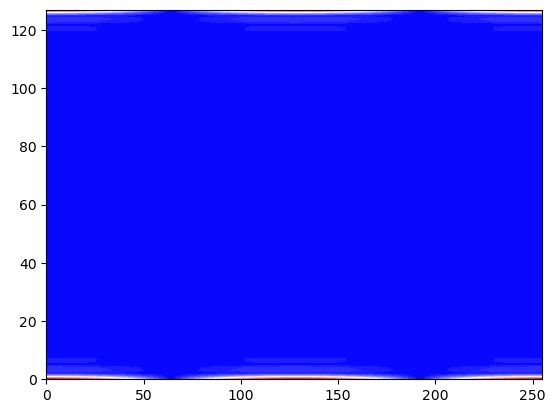

PyObject <matplotlib.contour.QuadContourSet object at 0x7f5bfee4c3d0>

In [28]:
PyPlot.contourf(final[1][:,:,1]', levels = 32, cmap = "bwr")

In [30]:
maximum(U_AE)

2.6910738471492586

### UV_to_VorDiv & VorDiv_to_UV

In [7]:
original, final, Cmesh = UnitTest_VelocityTrans(IC = Initial_Condition, iter_max = 10)
U_AE = abs.(final[1][:,:,:] - original[1][:,:,:])
V_AE = abs.(final[2][:,:,:] - original[2][:,:,:])
println("     Zonal wind L2E : ", LA.norm(U_AE))
println("Meridional wind L2E : ", LA.norm(V_AE))

     Zonal wind L2E : 64.23087856806093
Meridional wind L2E : 0.0


### Execution

In [8]:
#Shallow_Water_Main()